# Amazon Reviews Sentimental Analysis

## Installing TextBlob and Clean-Text 

In [39]:
!pip install -U textblob
!pip install clean-text

     -------------------------------------- 175.4/175.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 53.1/53.1 kB 2.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171032 sha256=3435eb21888814aea92f58ceb1c053dcc2811604d307f6d93244dd14b9944120
  Stored in directory: c:\users\neheil\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


## Reading the Scraped Dataset about amazon reviews 

In [1]:
import pandas as pd
df=pd.read_csv("Amazon_reviews.csv")
df.head(5)

,Unnamed: 0,Customer Name,Review Title,Rating,Reviews
0,0,Ashutosh singh,Mast hai,5.0 out of 5 stars,I will surprise with the quick touch response
1,1,Swati,Perfect buy,5.0 out of 5 stars,Must buy earbuds loved the bass quality and ac...
2,2,Anuragkumar,Perfect partner for lone wolf.,5.0 out of 5 stars,It got very smooth touch contel experience. Th...
3,3,Ravindra,So good,5.0 out of 5 stars,Balanced sounds in your ears without the distr...
4,4,Shubham Singh,Worth buying,5.0 out of 5 stars,This is the best earbud I have ever purchased....


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  149 non-null    object
 1   Review Title   149 non-null    object
 2   Rating         149 non-null    object
 3   Reviews        145 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB


In [4]:
df.columns

Index(['Customer Name', 'Review Title', 'Rating', 'Reviews'], dtype='object')

In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

## Importing Libraries

In [2]:
import re
import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
stemmer= PorterStemmer()
lemmatizer = WordNetLemmatizer()
from textblob import TextBlob
from cleantext import clean

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neheil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neheil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Neheil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Neheil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Processing the raw data using varies libraries

In [5]:
# processing the reviews one by one
sentiment=[]
for index in df.index:
    review1=df.loc[index]["Reviews"]
    # cleaning the emoji 
    review=clean(review1, no_emoji=True)
    # removing the numbers
    pattern=r'[0 - 9]'
    reviews=re.sub(pattern," ",review)
    # lowering the case
    reviews=reviews.lower()
    reviews=str(TextBlob(reviews).correct())
    # creating the tokens from reviews
    tokens=RegexpTokenizer(r'\w+').tokenize(reviews)
    # removing the stopwords from the tokens
    cleaned_tokens=[token for token in tokens if token not in stopwords]
    # joining the cleaned tokens
    clean_reviews=" ".join(cleaned_tokens)
    #using textblob analysis the sentiment of the review
    analysis=TextBlob(clean_reviews)
    if analysis.sentiment.polarity>0:
        sentiment.append('positve')
    elif analysis.sentiment.polarity==0:
        sentiment.append('neutral')
    else:
        sentiment.append('negetive')
# adding the new sentiment column in df       
df['Sentiment']=sentiment 


In [15]:
df.drop(["Unnamed: 0","sentiment"],axis=1,inplace=True)

In [16]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews,Sentiment
0,Ashutosh singh,Mast hai,5.0 out of 5 stars,I will surprise with the quick touch response,positve
1,Swati,Perfect buy,5.0 out of 5 stars,Must buy earbuds loved the bass quality and ac...,positve
2,Anuragkumar,Perfect partner for lone wolf.,5.0 out of 5 stars,It got very smooth touch contel experience. Th...,positve
3,Ravindra,So good,5.0 out of 5 stars,Balanced sounds in your ears without the distr...,neutral
4,Shubham Singh,Worth buying,5.0 out of 5 stars,This is the best earbud I have ever purchased....,positve
5,Kavilash Fund,Great,5.0 out of 5 stars,All over performance is good,positve
6,harsh khatiwala,Nice!,5.0 out of 5 stars,Nice!!!,positve
7,Joshua tajo,Its a great airbuds for gaming.....,5.0 out of 5 stars,The media could not be loa...,positve
8,Deepak,Awesome,5.0 out of 5 stars,The media could not be loa...,positve
9,Sam,Lost of charging problem,2.0 out of 5 stars,In Charging box the left charging point doesn'...,positve


In [20]:
# finding the value counts of each category of analysis
df_senti=df["Sentiment"].value_counts().reset_index()
df_senti

,index,Sentiment
0,positve,106
1,neutral,27
2,negetive,16


In [17]:
import matplotlib.pyplot as plt


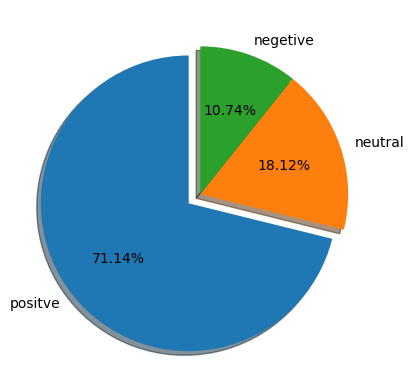

In [22]:
# ploting the value count of analysis
myexplode=[0.1,0,0]
plt.pie(df_senti["Sentiment"],labels=df_senti["index"],startangle = 90,explode=myexplode,shadow=True,autopct='%1.2f%%')
plt.show()

### As we see these amazon reviews on ear phone consists of more positive reviews, after that neutral reviews are more in number